<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/Prophet_Base_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base Case for Prophet data on New York City

## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

## Load Data and Preprocessing

### August 27th Data

#### Load August 27th Data

In [3]:
NY_labeledData_Aug27 = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/NY_labeledData_Aug27.csv',low_memory=False)
print(NY_labeledData_Aug27.shape)

(9690, 18)


#### Preprocessing 

Total Days: 172

30% Reduction: 120 Days

Days Difference: 52 Days

In [4]:
NY_labeledData_Aug27 = NY_labeledData_Aug27.astype({'label': 'string'})

In [5]:
NY_labeledData_Aug27 = NY_labeledData_Aug27.dropna()

In [6]:
NY_labeledData_Aug27['label_y'] = preprocessing.LabelEncoder().fit_transform(NY_labeledData_Aug27['label'])

In [7]:
NY_labeledData_Aug27.rename(columns={'Date': 'ds', 'label_y': 'y'}, inplace=True)

In [8]:
mask = (NY_labeledData_Aug27['ds'] > '2020-03-01') & (NY_labeledData_Aug27['ds'] <= '2020-06-29')
NY_labeledData_70 = NY_labeledData_Aug27.loc[mask]
NY_labeledData_70.tail()

,ds,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,y
6778,2020-06-29,36057,Montgomery County,-12.0,13.0,0.0,0.0,-31.0,8.0,65.94,4.168,66,122.124355,1,0.749,0,1.428571,LessSpread,0
6779,2020-06-29,36119,Westchester County,-18.0,-6.0,63.0,-43.0,-45.0,15.0,21.57,2.392,36,2247.400697,1,0.798,18,34.428571,LessSpread,0
6780,2020-06-29,36017,Chenango County,1.0,19.0,0.0,0.0,-36.0,8.0,92.97,3.845,50,52.830843,1,0.735,0,0.857143,LessSpread,0
6781,2020-06-29,36063,Niagara County,-9.0,17.0,200.0,-24.0,-33.0,7.0,64.40,3.074,47,400.645149,1,0.730,2,5.000000,LessSpread,0
6782,2020-06-29,36015,Chemung County,-10.0,11.0,0.0,-43.0,-26.0,7.0,71.85,2.889,49,204.875414,1,0.594,0,0.142857,LessSpread,0


In [9]:
NY_labeledData_70_Ulster_County = NY_labeledData_70.loc[NY_labeledData_70['County Name'] == 'Ulster County']
NY_labeledData_Ulster_County = NY_labeledData_Aug27.loc[NY_labeledData_Aug27['County Name'] == 'Ulster County']

In [10]:
NY_labeledData_70_Ulster_County['y'].unique()

array([0, 2, 1])

In [11]:
NY_labeledData_Aug27.head()

,ds,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,y
0,2020-03-01,36001,Albany County,10.0,13.0,19.0,4.0,7.0,-1.0,-4.87,2.616,54,584.364958,0,0.0,0,0.0,LessSpread,0
1,2020-03-01,36003,Allegany County,47.0,13.0,0.0,0.0,1.0,0.0,19.81,0.707,12,44.778541,0,0.0,0,0.0,LessSpread,0
2,2020-03-01,36123,Yates County,31.0,33.0,0.0,0.0,7.0,0.0,28.14,5.004,72,73.676584,0,0.0,0,0.0,LessSpread,0
3,2020-03-01,36119,Westchester County,8.0,-1.0,12.0,1.0,0.0,0.0,-4.34,3.903,59,2247.400697,0,0.0,0,0.0,LessSpread,0
4,2020-03-01,36031,Essex County,16.0,11.0,17.0,0.0,1.0,0.0,60.18,12.600,197,20.557565,0,0.0,0,0.0,LessSpread,0


In [32]:
NY_labeledData_70_Ulster_County.tail()

,ds,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,y
6535,2020-06-25,36111,Ulster County,-12.0,10.0,0.0,6.0,-31.0,10.0,64.96,5.563,85,157.94937,1,0.818,5,2.714286,LessSpread,0
6556,2020-06-26,36111,Ulster County,-18.0,5.0,0.0,-8.0,-32.0,10.0,86.42,5.941,90,157.94937,1,0.818,3,2.714286,LessSpread,0
6628,2020-06-27,36111,Ulster County,-23.0,6.0,0.0,9.0,-13.0,6.0,69.99,3.161,48,157.94937,1,0.818,5,3.285714,LessSpread,0
6669,2020-06-28,36111,Ulster County,-18.0,5.0,199.0,6.0,-5.0,4.0,62.63,2.514,38,157.94937,1,0.818,5,3.428571,LessSpread,0
6756,2020-06-29,36111,Ulster County,-10.0,5.0,0.0,-2.0,-31.0,10.0,55.25,3.253,49,157.94937,1,0.818,0,3.142857,LessSpread,0


In [12]:
NY_labeledData_Aug27.tail()

,ds,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,y
9685,2020-08-19,36099,Seneca County,0.0,0.0,0.0,0.0,0.0,0.0,162.86,6.632,98,105.081709,1,0.864,0,0.571429,LessSpread,0
9686,2020-08-19,36023,Cortland County,0.0,0.0,0.0,0.0,0.0,0.0,85.52,3.803,141,95.398588,1,0.803,0,0.142857,LessSpread,0
9687,2020-08-19,36101,Steuben County,0.0,0.0,0.0,0.0,0.0,0.0,103.47,5.512,88,68.590352,1,0.674,0,1.000000,LessSpread,0
9688,2020-08-19,36103,Suffolk County,0.0,0.0,0.0,0.0,0.0,0.0,60.19,5.039,58,1618.991283,1,0.782,70,51.000000,LessSpread,0
9689,2020-08-19,36123,Yates County,0.0,0.0,0.0,0.0,0.0,0.0,350.22,6.347,91,73.676584,1,0.884,0,0.285714,LessSpread,0


### August 26 Data

#### Load August 26 Data

In [40]:
NY_labeledData_Aug26 = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/NY_sd_inertia_labeledData_Aug26.csv',low_memory=False)
print(NY_labeledData_Aug26.shape)

FileNotFoundError: ignored

In [ ]:
NY_labeledData_Aug26.head()

## Prophet Model Implementation for August 27rd

In [41]:
prophet_model = Prophet()

In [42]:
prophet_model.fit(NY_labeledData_70_Ulster_County)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
future = prophet_model.make_future_dataframe(periods=51)

In [44]:
forecast = prophet_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
164,2020-08-15,-0.641909,-1.400377,0.121260
165,2020-08-16,-0.641326,-1.371429,0.121575
166,2020-08-17,-0.670422,-1.422139,0.048145
167,2020-08-18,-0.711426,-1.471219,0.024633
168,2020-08-19,-0.710868,-1.473824,0.064632


In [45]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
164,2020-08-15,-0.655841,-1.400377,0.121260,-0.656081,-0.655608,0.013932,0.013932,0.013932,0.013932,0.013932,0.013932,0.0,0.0,0.0,-0.641909
165,2020-08-16,-0.665452,-1.371429,0.121575,-0.665697,-0.665211,0.024125,0.024125,0.024125,0.024125,0.024125,0.024125,0.0,0.0,0.0,-0.641326
166,2020-08-17,-0.675063,-1.422139,0.048145,-0.675319,-0.674814,0.004640,0.004640,0.004640,0.004640,0.004640,0.004640,0.0,0.0,0.0,-0.670422
167,2020-08-18,-0.684674,-1.471219,0.024633,-0.684938,-0.684417,-0.026752,-0.026752,-0.026752,-0.026752,-0.026752,-0.026752,0.0,0.0,0.0,-0.711426
168,2020-08-19,-0.694285,-1.473824,0.064632,-0.694558,-0.694021,-0.016583,-0.016583,-0.016583,-0.016583,-0.016583,-0.016583,0.0,0.0,0.0,-0.710868


In [46]:
NY_labeledData_Ulster_County.tail()

,ds,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,label,y
9405,2020-08-15,36111,Ulster County,-4.0,9.0,0.0,37.0,-14.0,1.0,131.12,5.053,77,157.94937,1,0.818,3,4.571429,LessSpread,0
9466,2020-08-16,36111,Ulster County,-4.0,1.0,239.0,24.0,-13.0,2.0,109.20,2.003,30,157.94937,1,0.818,6,4.714286,LessSpread,0
9568,2020-08-17,36111,Ulster County,-4.0,1.0,0.0,20.0,-34.0,8.0,78.11,4.048,62,157.94937,1,0.818,3,3.714286,LessSpread,0
9632,2020-08-18,36111,Ulster County,0.0,0.0,0.0,0.0,0.0,0.0,87.84,4.134,63,157.94937,1,0.818,2,3.428571,LessSpread,0
9659,2020-08-19,36111,Ulster County,0.0,0.0,0.0,0.0,0.0,0.0,86.92,4.066,62,157.94937,1,0.818,6,4.142857,LessSpread,0


In [47]:
NY_labeledData_Ulster_County.shape

(170, 19)

In [48]:
NY_labeledData_70_Ulster_County.shape

(118, 19)

In [49]:
future.shape

(169, 1)

### Plot forecast

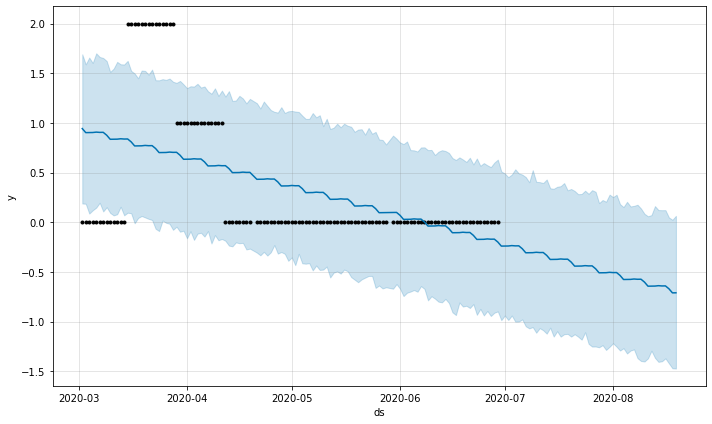

In [52]:
fig1 = prophet_model.plot(forecast)

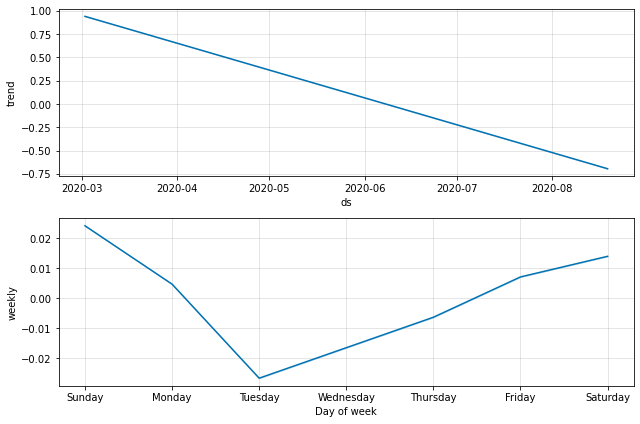

In [53]:
fig2 = prophet_model.plot_components(forecast)

In [54]:
plot_plotly(prophet_model, forecast)

In [55]:
plot_components_plotly(prophet_model, forecast)

### Diagnostics

In [59]:
# 172 total days of data (30%)
df_cv = cross_validation(prophet_model, initial='118 days', period='1 days', horizon = '1 days')
df_cv.tail()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-06-28 00:00:00 and 2020-06-28 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-29,-0.206164,-0.981087,0.496,0,2020-06-28


In [ ]:
#cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
#df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')

In [60]:
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,1 days,0.042504,0.206164,0.206164,inf,1.0


INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0


TypeError: ignored

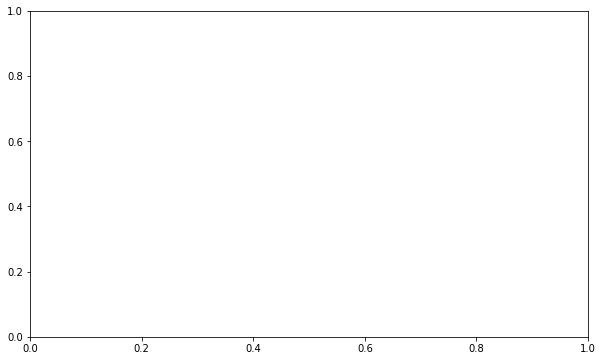

In [61]:
fig = plot_cross_validation_metric(df_cv, metric='mape')